In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBClassifier, XGBRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.preprocessing import OneHotEncoder
import time

In [135]:
# Helper Functions
def load_csv(path):
    df = pd.read_csv(path)
    return df

def load_excel(path):
    df = pd.read_excel(path)
    return df

def split(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

def scale(X_train, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

def one_hot_encode(df,column):
    encoder = OneHotEncoder(sparse_output=False)
    encoder_array = encoder.fit_transform(df[[column]])
    encoder_df = pd.DataFrame(encoder_array, columns=encoder.get_feature_names_out([column]))
    df_encoded = pd.concat([df,encoder_df], axis=1).drop(columns=column)
    return df_encoded

def logistic_regression(X_train, y_train, X_test, y_test):
    predictor = LogisticRegression()
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cf = confusion_matrix(y_test, y_pred)
    return accuracy, cf, runtime

def support_vector_classifier(X_train, y_train, X_test, y_test, kernel='rbf'):
    predictor = SVC(kernel=kernel)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cf = confusion_matrix(y_test, y_pred)
    return accuracy, cf, runtime

def support_vector_regressor(X_train, y_train, X_test, y_test, kernel='rbf'):
    predictor = SVR(kernel=kernel)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return r2, runtime

def decision_tree_classifier(X_train, y_train, X_test, y_test):
    predictor = DecisionTreeClassifier()
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cf = confusion_matrix(y_test, y_pred)
    return accuracy, cf, runtime

def decision_tree_regressor(X_train, y_train, X_test, y_test):
    predictor = DecisionTreeRegressor()
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return r2, runtime

def linear_regression(X_train, y_train, X_test, y_test):
    predictor = LinearRegression()
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return r2, runtime

def adaboost_classifier(X_train, y_train, X_test, y_test, n_estimators=200):
    predictor = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cf = confusion_matrix(y_test, y_pred)
    return accuracy, cf, runtime

def xgboost_classifier(X_train, y_train, X_test, y_test, n_estimators=200, random_state=42):
    predictor = XGBClassifier(n_estimators=n_estimators, random_state=random_state)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cf = confusion_matrix(y_test, y_pred)
    return accuracy, cf, runtime

def catboost_classifier(X_train, y_train, X_test, y_test, iterations=200):
    predictor = CatBoostClassifier(iterations=iterations, verbose=0, random_state=42)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cf = confusion_matrix(y_test, y_pred)
    return accuracy, cf, runtime 

def adaboost_regressor(X_train, y_train, X_test, y_test, n_estimators=200):
    predictor = AdaBoostRegressor(n_estimators=n_estimators, random_state=42)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return r2, runtime 

def xgboost_regressor(X_train, y_train, X_test, y_test, n_estimators=200):
    predictor = XGBRegressor(n_estimators=n_estimators, random_state=42)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return r2, runtime

def catboost_regressor(X_train, y_train, X_test, y_test, iterations=200):
    predictor = CatBoostRegressor(iterations=iterations, verbose=0, random_state=42)
    start_time = time.time()
    predictor.fit(X_train, y_train)
    end_time = time.time()
    runtime = end_time - start_time
    y_pred = predictor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return r2, runtime

In [136]:
import os

path = r"G:\Study\iit kharagpur\ML Lab\ML_Class\datasets\sonar"
data_path = os.path.join(path,"sonar.all-data")

### Pre-Processing


In [137]:
columns = [f"A{i+1}" for i in range(61)]
data = pd.read_csv(data_path, header=None)
data = pd.DataFrame(data.values, columns=columns)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61
0,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.014,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.228,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.018,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.01,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.015,0.0085,0.0073,0.005,0.0044,0.004,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.059,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.011,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.163,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.076,0.0958,0.099,0.1018,0.103,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.018,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.016,0.0029,0.0051,0.0062,0.0089,0.014,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.049,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [138]:
mapping = {'M':0, 'R':1}
data['A61'] = data['A61'].map(mapping)
result = data.isnull().sum()
np.array(result).reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

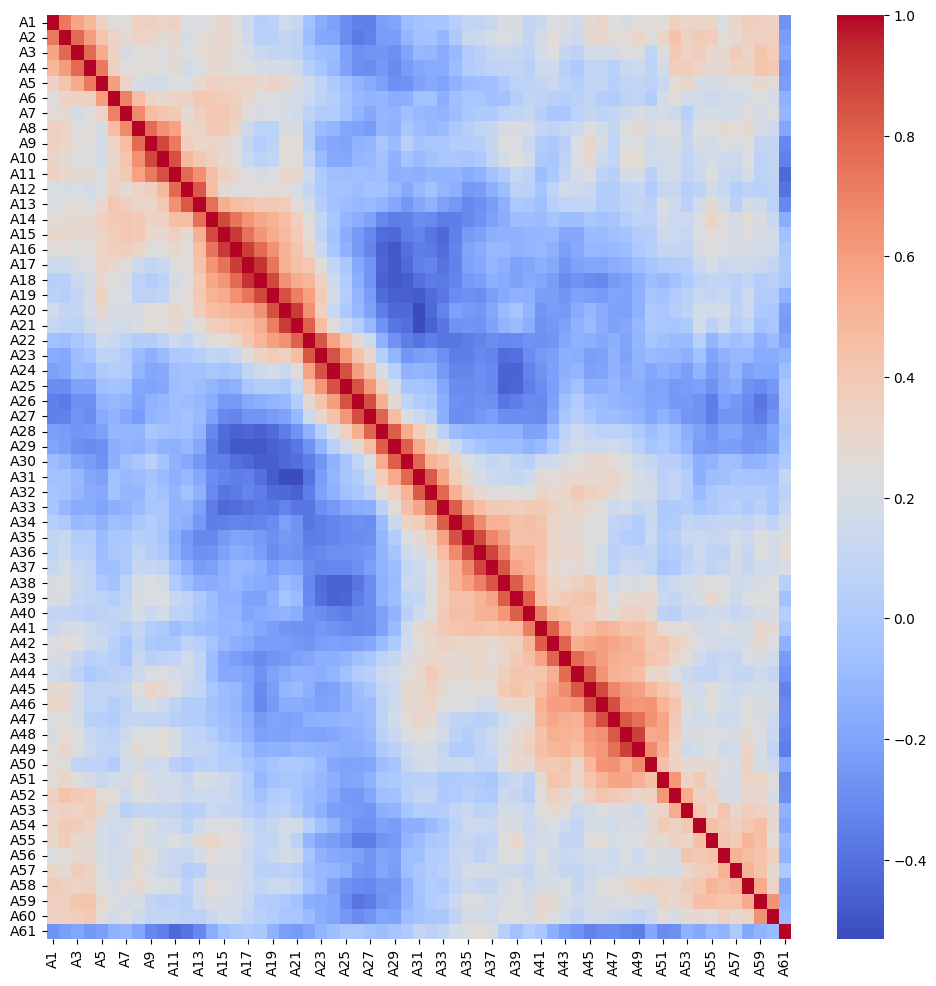

In [139]:
import seaborn as sns
%matplotlib inline

corr_matrix = data.corr()

plt.figure(figsize=(12,12))
sns.heatmap(data=corr_matrix, cmap="coolwarm")
plt.show()

In [140]:
y = data.iloc[:,-1]
X = data.iloc[:,:-1]

In [141]:
# Using PCA using only top 10 features
from sklearn.decomposition import PCA

X = X.apply(pd.to_numeric, errors='coerce')
data_numeric = X.select_dtypes(include=['number']).dropna()

pca = PCA(n_components=10)
pca_features = pca.fit_transform(data_numeric)

X = pd.DataFrame(pca_features, columns=[f"PC{i+1}" for i in range(10)])
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.576093,-0.319393,0.387291,-0.378009,-0.243780,0.156243,0.427736,0.074832,-0.024347,0.318054
1,0.970667,-1.018039,-0.834156,0.107423,0.286070,-0.178684,0.260332,0.385600,-0.004030,-0.072529
2,0.325887,-0.874209,-0.246015,0.863031,0.069110,0.300833,0.412807,0.075321,-0.010855,-0.438559
3,-0.852035,-0.690863,0.013390,-0.110257,-0.554050,-0.397968,-0.492569,-0.220460,0.537003,-0.436795
4,0.064756,-0.222968,-0.638601,0.140432,0.135854,-0.052881,0.386558,0.066549,-0.117006,-0.419277
...,...,...,...,...,...,...,...,...,...,...
203,-0.041781,1.031644,-0.265669,0.021516,-0.015439,-0.097304,-0.003784,0.177926,-0.027908,-0.264179
204,-0.219149,1.153807,-0.203619,0.045836,0.183272,-0.012770,-0.078507,0.264831,0.070749,-0.303296
205,-0.297733,1.151860,-0.250096,-0.057702,0.163566,-0.015275,-0.045792,0.225904,0.072130,-0.313044
206,0.045761,0.995970,-0.199677,-0.066516,-0.147227,0.084600,-0.031038,0.067444,0.025771,-0.171120


In [142]:
X_train, X_test, y_train, y_test = split(X,y)
X_train, X_test = scale(X_train, X_test)

In [143]:
X_train

array([[ 0.53530187, -0.31178164,  0.40913002, ..., -1.18858666,
        -2.57623394, -0.76431406],
       [-0.09205744,  1.69456979, -0.76822589, ...,  0.8578719 ,
        -0.10818664, -1.43655725],
       [-2.2987158 , -1.46174971, -0.51072704, ..., -0.6625985 ,
         0.3442732 , -0.12045408],
       ...,
       [-0.65147574,  0.74595543, -1.93264336, ...,  0.02245477,
        -0.2020253 ,  0.05211074],
       [-0.42194361,  0.74072078, -0.30109508, ...,  0.61711097,
        -1.00719076, -0.5692773 ],
       [ 1.07487359, -2.04084695, -1.79986902, ...,  1.19402868,
         0.67783047,  0.67966673]])

In [144]:
# Logistic Regression
acc_lr, cf_lr, runtime = logistic_regression(X_train, y_train, X_test, y_test)
print(f"The accuracy of Logistic Regression is {acc_lr*100:.2f}")
print(f"The runtime is {runtime:.2f}")

# Decision Tree
acc_dt, cf_dt, runtime = decision_tree_classifier(X_train, y_train, X_test, y_test)
print(f"The accuracy of Decision Tree is {acc_dt*100:.2f}")
print(f"The runtime is {runtime:.2f}")

# Support Vector Machine
acc_svm, cf_svm, runtime = support_vector_classifier(X_train, y_train, X_test, y_test)
print(f"The accuracy of Support Vector Classifier is {acc_svm*100:.2f}")
print(f"The runtime is {runtime:.2f}")

# AdaBoost
acc_ada, cf_ada, runtime = adaboost_classifier(X_train, y_train, X_test, y_test)
print(f"The accuracy of AdaBoost is {acc_ada*100:.2f}")
print(f"The runtime is {runtime:.2f}")

# XGBoost
acc_xg, cf_xg, runtime = xgboost_classifier(X_train, y_train, X_test, y_test)
print(f"The accuracy of XGBoost is {acc_xg*100:.2f}")
print(f"The runtime is {runtime:.2f}")

#CatBoost
acc_cat, cf_cat, runtime = catboost_classifier(X_train, y_train, X_test, y_test)
print(f"The accuracy of CatBoost is {acc_cat*100:.2f}")
print(f"The runtime is {runtime:.2f}")

The accuracy of Logistic Regression is 76.19
The runtime is 0.01
The accuracy of Decision Tree is 66.67
The runtime is 0.00
The accuracy of Support Vector Classifier is 90.48
The runtime is 0.00
The accuracy of AdaBoost is 78.57
The runtime is 0.63
The accuracy of XGBoost is 83.33
The runtime is 0.08
The accuracy of CatBoost is 76.19
The runtime is 0.37


In [146]:
confusion_matrices = [[cf_lr, "linear regression"], [cf_dt, 'decision tree'], [cf_svm, "support vector machine"], [cf_ada, 'adaboost'], [cf_xg, "xgboost"], [cf_cat, 'catboost']]
for i in confusion_matrices:
    print(i[1])
    print(i[0])
    print('\n')

linear regression
[[18  8]
 [ 2 14]]


decision tree
[[16 10]
 [ 4 12]]


support vector machine
[[23  3]
 [ 1 15]]


adaboost
[[20  6]
 [ 3 13]]


xgboost
[[21  5]
 [ 2 14]]


catboost
[[19  7]
 [ 3 13]]


